In [1]:
#Implementation of Harris Corner Detector

#Import Libraries
import matplotlib.pyplot as plt
import numpy as np
import imageio
from scipy import ndimage

In [2]:
#This cell contains all the functions used in Phase I

#Define RGB2gray function
def rgb2gray(img) :
    return np.dot(img[..., :3], [0.2989, 0.5870, 0.1140])


#Detemine gradient function for Fx and Fy using sobel filter(normlized)
def gradient_x(img) :
    grad_img = ndimage.convolve(img, np.array([[-1, 0, 1],[-2, 0, 2],[-1, 0, 1]]))
    return grad_img/np.max(grad_img)

def gradient_y(img) :
    grad_img = ndimage.convolve(img, np.array([[-1, -2, -1],[0, 0, 0],[1, 2, 1]]))
    return grad_img/np.max(grad_img)

uint8
166.95885098503118
9427
50


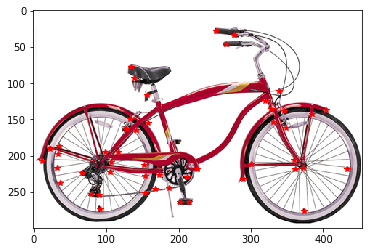

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


uint8
146.24855790276527
1292
17


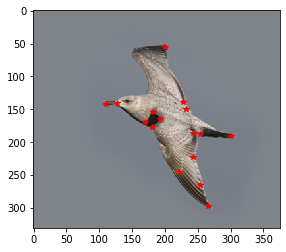

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


uint8
80.64677577436645
1250
22


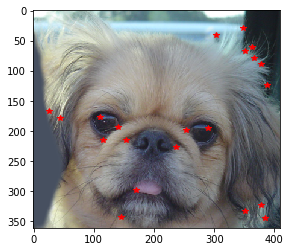

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


uint8
184.85224739171372
2110
18


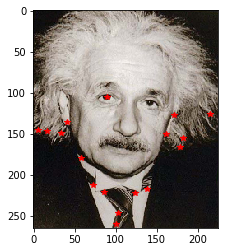

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


uint8
85.099413345436
4080
33


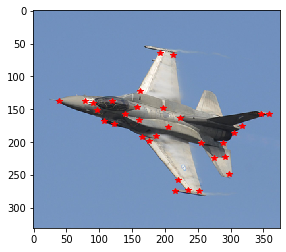

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


uint8
343.16915678115924
15513
85


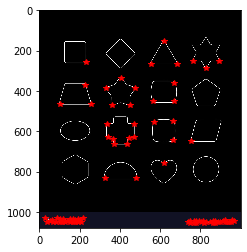

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


In [11]:
#Harris Corner Detector Implementation and test
input_path = "../data/"
output_path = "../harris_output/"
img_name = ["bicycle.bmp", "bird.bmp", "dog.bmp", "einstein.bmp", "plane.bmp", "toy_image.jpg"]
ratio = [0.05, 0.05, 0.05, 0.05, 0.01, 0.001]
count = 0 #for equivalent ratio access

for img in img_name :
#Phase I : Find filtered grdient
    #Load the input images
    input_img = imageio.imread(input_path + img)
    print(input_img.dtype)

    #Convert the image to grayscale
    gray_input_img = rgb2gray(input_img)

    #Apply gaussian blurring
    blur_img = ndimage.gaussian_filter(gray_input_img, sigma = 1.0)

    #Find gradient Fx
    x_grad = gradient_x(blur_img)

    #Find gradient Fy
    y_grad = gradient_y(blur_img)


    
#Phase II : Find corners
    xx_grad = x_grad * x_grad
    yy_grad = y_grad * y_grad
    xy_grad = x_grad * y_grad
    tuple_data = [] #Contains y, x Co-ordinates and its corner response
    k = 0.04
    max = 0

    for i in range(1, int(input_img.shape[0] - 1)) :
            for j in range(1, int(input_img.shape[1] - 1)) :
                window_x = xx_grad[i-4 : i+5 , j-4 : j+5]
                window_y = yy_grad[i-4 : i+5 , j-4 : j+5]
                window_xy = xy_grad[i-4 : i+5 , j-4 : j+5] 
                sum_xx = np.sum(window_x)
                sum_yy = np.sum(window_y)
                sum_xy = np.sum(window_xy)
                determinant = (sum_xx * sum_yy) - (sum_xy * sum_xy)
                trace = sum_xx + sum_yy
                R = determinant - (k * trace * trace)
                tuple_data.append((i, j, R))
                if(R > max) :
                    max = R
    print(max)
    #L contains y, x co-ordinate(whose value is greater than threshold) and their corner response of those co-ordinates
    L = []
    thres_ratio = ratio[count]
    count+=1
    threshold = thres_ratio * max
    for res in tuple_data :
        i, j, R = res
        if R > threshold :
            L.append([i, j, R])
          
    
    
#Phase III : Non maximal suppression
    sorted_L = sorted(L, key = lambda x: x[2], reverse = True)
    final_L = [] #final_l contains list after non maximal suppression
    final_L.append(sorted_L[0][:-1])
    dis = 10
    xc, yc = [], []
    for i in sorted_L :
        for j in final_L :
            if(abs(i[0] - j[0] <= dis) and abs(i[1] - j[1]) <= dis) :
                break
        else :
            final_L.append(i[:-1])
            xc.append(i[1])
            yc.append(i[0])
    print(len(sorted_L))
    print(len(final_L))
    
    #Print Final Image
    corner_img = np.zeros(input_img.shape)
    #(input_img.shape[0], input_img.shape[1], 3), dtype = np.uint8)

    for i in final_L :
        y, x = i[0], i[1]
        corner_img[y][x] = 1

    plt.imshow(input_img, cmap = plt.get_cmap('gray'))
    plt.plot(xc, yc, '*', color='red')
    plt.savefig(output_path + img.split('.')[0] + "/img2_corners.jpg")
    plt.show()
    imageio.imwrite(output_path + img.split('.')[0] + "/img1_corners.jpg", corner_img, cmap = 'gray') 
    